# Ejercicio Ifood dataset Diabetes 130 - US hospitals for years 1999-2008

## Presentado por: Steven Salgado González. CC 1017244922

A continuación presento mi interpretación al ejercicio propuesto como prueba para Ifood, entre las notas iniciales para tener en cuenta se tiene:
* Se decide resolver un problema de clasificación, donde se hará una predicción sobre la readmisión de pacientes.
* Se inicia con un análisis exploratorio de la data, encontrando que variables resultan importantes, cuales requieren ser transformadas, y cuales no aportan a la interpretación de la variable objetivo, por lo que son descartadas.
* Se realizan distintas interpretaciones del ejercicio cambiando el objetivo, con el fin de obtener modelos que respondan distintas preguntas.

Espero que este ejercicio sea del agrado de aquella persona encargada de revisarlo y demuestre mis capacidades para el cargo al que me postulo, gracias por la oportunidad!



### Se importan las variables que se utilizarán a lo largo del ejercicio

* Estas variabes son importadas en esta primera celda a medida que se van necesitando durante la realización del ejercicio, como estandar para conocer que librerias me encuentro utilizando

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
from IPython.display import Image
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


### Se importa el dataset y se da un vistazo inicial a la data

In [122]:
FILENAME = "dataset_diabetes/diabetic_data.csv"
diabetes = pd.read_csv(FILENAME)
pd.options.display.max_columns = 100

In [123]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [124]:
diabetes.shape

(101766, 50)

In [125]:
print("La cantidad de columnas numéricas es:", diabetes.select_dtypes(include='number').shape[1])
print("La cantidad de columnas cualitativas es:", diabetes.select_dtypes(include='object').shape[1])

La cantidad de columnas numéricas es: 13
La cantidad de columnas cualitativas es: 37


* De las celdas anteriores se puede observar que contamos con un dataset de 101766 filas y 50 columnas, de las cuales 13 son numéricas y 37 son cualitativas

### Reemplazo de datos nulos
* Observando el head que se hizo en la sección anterior, se encuentra que los valores desconocidos estan representados con el simbolo "?", por lo que se realizará un reemplazo a NaN de numpy para estandarizar esta información

In [126]:
diabetes = diabetes.replace("?", np.nan)

In [127]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Limpieza de datos nulos
* Primero se buscan las columnas con datos nulos
* Posteriormente (se especifica en una celda de Markdown) se decide que columnas pueden ser ignoradas

In [128]:
# Se encuentra la proporción de valores faltantes en cada columna

(diabetes.isna().sum() / diabetes.shape[0] * 100).sort_values(ascending=False)[(diabetes.isna().sum() / diabetes.shape[0] * 100) > 0]

weight               96.858479
medical_specialty    49.082208
payer_code           39.557416
race                  2.233555
diag_3                1.398306
diag_2                0.351787
diag_1                0.020636
dtype: float64

C:\Users\PC\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Porcentaje de datos nulos')

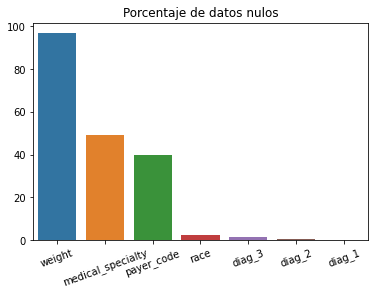

In [129]:
x_graph =  (diabetes.isna().sum() / diabetes.shape[0] * 100).sort_values(ascending=False)[(diabetes.isna().sum() / diabetes.shape[0] * 100) > 0]
plt.xticks(rotation=20)
sns.barplot(x_graph.index, x_graph.values).set_title("Porcentaje de datos nulos")

* Se encuentra que para las columnas de: Peso, Especialidad Medica y código de pagador, la proporción de valores faltantes supera el 30%, por lo que se decide no tener en cuenta dichas columnas, ni imputar valores.

In [130]:
diabetes = diabetes.drop(columns=["weight", "medical_specialty", "payer_code" ])

In [131]:
# Se observa que quedamos con 47 columnas
diabetes.shape

(101766, 47)

In [132]:
(diabetes.isna().sum() / diabetes.shape[0] * 100).sort_values(ascending=False)[(diabetes.isna().sum() / diabetes.shape[0] * 100) > 0]

race      2.233555
diag_3    1.398306
diag_2    0.351787
diag_1    0.020636
dtype: float64

* Se encuentra que para las columnas: Raza, y diagnosticos 1,2,3 hay porcentajes bajos de datos vacios, (menores al 3%), teniendo en cuenta que el dataset es de más de 100.000 filas, se considera que eliminando estos datos no se pierde la capacidad del mismo para otorgar información, por lo que estos valores son eliminados

In [133]:
diabetes = diabetes.dropna(subset=["race", "diag_3", "diag_2", "diag_1"], axis=0)

### Valores únicos en columnas cualitativas
* Se toman las variables cualitativas del dataset, y se observa sus valores únicos, para verificar si se necesita estandarizar o reemplazar valores

In [134]:
object_columns_list = diabetes.select_dtypes(include="object").columns
len(object_columns_list)

34

* Se recorreran de 10 en 10 para no saturar de información

In [135]:
for col in object_columns_list[:11]:
    print(col)
    print("-----------------------")
    display(diabetes[col].value_counts(dropna=False))
    print()
    

race
-----------------------


Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1484
Asian                625
Name: race, dtype: int64


gender
-----------------------


Female             52833
Male               45219
Unknown/Invalid        1
Name: gender, dtype: int64


age
-----------------------


[70-80)     25306
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: age, dtype: int64


diag_1
-----------------------


428    6730
414    6374
786    3900
410    3514
486    3412
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: diag_1, Length: 713, dtype: int64


diag_2
-----------------------


428    6517
276    6513
250    5412
427    4919
401    3613
       ... 
316       1
963       1
506       1
944       1
927       1
Name: diag_2, Length: 740, dtype: int64


diag_3
-----------------------


250    11208
401     8090
276     5097
428     4491
427     3865
       ...  
657        1
992        1
732        1
951        1
971        1
Name: diag_3, Length: 786, dtype: int64


max_glu_serum
-----------------------


None    92845
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64


A1Cresult
-----------------------


None    81860
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64


metformin
-----------------------


No        78808
Steady    17677
Up         1017
Down        551
Name: metformin, dtype: int64


repaglinide
-----------------------


No        96530
Steady     1371
Up          107
Down         45
Name: repaglinide, dtype: int64


nateglinide
-----------------------


No        97362
Steady      657
Up           23
Down         11
Name: nateglinide, dtype: int64

* Para la columna gender (segunda posición del arreglo), se observa que hay un único dato diferente a los géneros masculino y femenino, por lo que se decide eliminar la fila que contiene ese dato

In [136]:
diabetes = diabetes[diabetes.gender != "Unknown/Invalid"]

* Las demás columnas de esta sección (de la 1 a la 10) seguiran igual parcialmente (en los siguientes pasos se realizará una interpretación de los valores de diagnosticos 1, 2 y 3)

In [137]:
for col in object_columns_list[11:21]:
    print(col)
    print("-----------------------")
    display(diabetes[col].value_counts(dropna=False))
    print()

chlorpropamide
-----------------------


No        97969
Steady       76
Up            6
Down          1
Name: chlorpropamide, dtype: int64


glimepiride
-----------------------


No        93065
Steady     4488
Up          315
Down        184
Name: glimepiride, dtype: int64


acetohexamide
-----------------------


No        98051
Steady        1
Name: acetohexamide, dtype: int64


glipizide
-----------------------


No        85769
Steady    10990
Up          752
Down        541
Name: glipizide, dtype: int64


glyburide
-----------------------


No        87791
Steady     8932
Up          791
Down        538
Name: glyburide, dtype: int64


tolbutamide
-----------------------


No        98030
Steady       22
Name: tolbutamide, dtype: int64


pioglitazone
-----------------------


No        90955
Steady     6755
Up          227
Down        115
Name: pioglitazone, dtype: int64


rosiglitazone
-----------------------


No        91886
Steady     5908
Up          174
Down         84
Name: rosiglitazone, dtype: int64


acarbose
-----------------------


No        97753
Steady      286
Up           10
Down          3
Name: acarbose, dtype: int64


miglitol
-----------------------


No        98015
Steady       31
Down          4
Up            2
Name: miglitol, dtype: int64

* Se encuentra que en la columna acetohexamid (tercera columna del arreglo) la proporción es totalmente desbalanceada, ya que solo existe 1 dato de "steady" y 98051 de "No", por lo que se decide eliminar esta columna. 
* Aunque otras columnas como tolbutamide cuentan con casos similares al que menciono de acetohexamide, las dejaré aun para después ver si tienen algun aporte en la interpretabilidad del modelo

In [138]:
diabetes = diabetes.drop(columns="acetohexamide")
diabetes.shape

(98052, 46)

In [139]:
for col in object_columns_list[21:34]:
    print(col)
    print("-----------------------")
    display(diabetes[col].value_counts(dropna=False))
    print()

troglitazone
-----------------------


No        98049
Steady        3
Name: troglitazone, dtype: int64


tolazamide
-----------------------


No        98015
Steady       36
Up            1
Name: tolazamide, dtype: int64


examide
-----------------------


No    98052
Name: examide, dtype: int64


citoglipton
-----------------------


No    98052
Name: citoglipton, dtype: int64


insulin
-----------------------


No        45942
Steady    29368
Down      11843
Up        10899
Name: insulin, dtype: int64


glyburide-metformin
-----------------------


No        97383
Steady      660
Up            6
Down          3
Name: glyburide-metformin, dtype: int64


glipizide-metformin
-----------------------


No        98039
Steady       13
Name: glipizide-metformin, dtype: int64


glimepiride-pioglitazone
-----------------------


No        98051
Steady        1
Name: glimepiride-pioglitazone, dtype: int64


metformin-rosiglitazone
-----------------------


No    98052
Name: metformin-rosiglitazone, dtype: int64


metformin-pioglitazone
-----------------------


No        98051
Steady        1
Name: metformin-pioglitazone, dtype: int64


change
-----------------------


No    52774
Ch    45278
Name: change, dtype: int64


diabetesMed
-----------------------


Yes    75350
No     22702
Name: diabetesMed, dtype: int64


readmitted
-----------------------


NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

* Las columnas troglitazone, examide, citoglipton, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone demuestran o tener un único valor en toda la columna, o tener un desbalanceo total, por lo que se considera que no tendrán ningún aporte al modelo, por lo que serán eliminadas del dataset

In [140]:
columns_to_drop = ["troglitazone", "examide", "citoglipton", "glimepiride-pioglitazone", "metformin-rosiglitazone" , "metformin-pioglitazone"]
diabetes = diabetes.drop(columns=columns_to_drop)
diabetes.shape


(98052, 40)

* Despues de recorrer los valores únicos del dataset se termina con 40 columnas, 98052 filas, a continuación se continua con el análisis de los datos para observar que columnas pueden ser modificadas con el fin de claridad o mayor interpretabilidad

### Cambio en las columnas de Diagnostico 1 , 2 y 3

En la documentación del dataset se encuentra que las columnas de diagnostico estan basadas en una tabla de referencia denominada *ICD9*, tomando los primeros 3 digitos de la misma, a continuación se observa el dataset para ver si esta información es consistente


In [141]:
diabetes[["diag_1","diag_2", "diag_3"]].head(20)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


* Se observa que hay valores decimales, y valores que no son de 3 digitos, por lo que se aplicará una función para arreglar estas columnas y estandarizarlas en 3 digitos (las columnas que contienen las letras V o E también son tenidas en cuenta ya que según la literatura hacen parte de las enfermadades de *ICD9*

In [142]:
def format_icd9_code(code):
    """Formatea el código ICD9 para tener 3 dígitos."""
    code = str(code)[:3]
    if len(code) == 3:
        return code
    
    if len(code) == 2:
        return "0" + code
    
    if len(code) == 1:
        return "00" + code

In [143]:
for i in range(1, 4):
    diabetes[f"diag_{i}"] = diabetes[f"diag_{i}"].map(format_icd9_code)

In [144]:
diabetes[["diag_1","diag_2", "diag_3"]].head(20)

,diag_1,diag_2,diag_3
1,276,250,255
2,648,250,V27
3,008,250,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,038
9,434,198,486
10,250,403,996


In [145]:
for i in range(1,4):
    print(f"Cantidad de valores unicos para la columna de diagnostico {i}")
    print(len(diabetes[f"diag_{i}"].unique()))
    print("___________________________________________________________________")


Cantidad de valores unicos para la columna de diagnostico 1
680
___________________________________________________________________
Cantidad de valores unicos para la columna de diagnostico 2
665
___________________________________________________________________
Cantidad de valores unicos para la columna de diagnostico 3
695
___________________________________________________________________


##### Se observa que para cada columna hay más de 600 valores únicos de diagnostico, considero que el diagnostico es una variable importante respecto a la readmisión de un usuario, pero creo que dicha cantidad de valores unicos puede causar confusión en el modelo, por lo que buscando en literatura se encuentra la siguiente tabla [Link](https://en.wikipedia.org/wiki/List_of_ICD-9_codes_001%E2%80%93139:_infectious_and_parasitic_diseases)

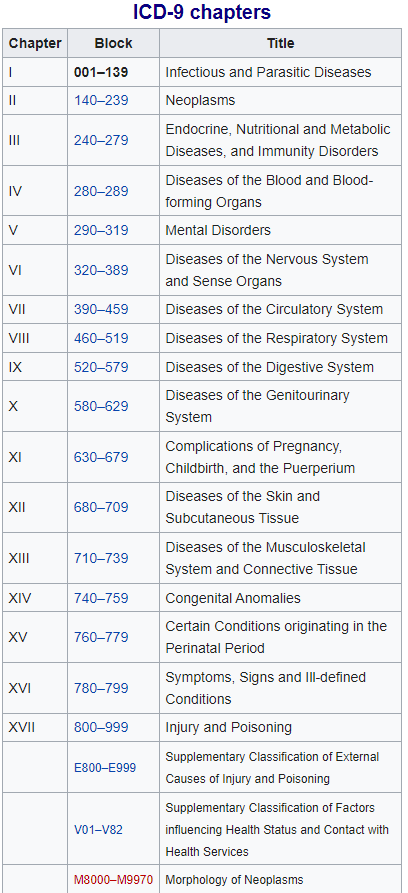

In [146]:
from IPython.display import Image
Image(filename='media/table_icd9.PNG')

##### Con esta tabla se hará una función para convertir los valores de diagnostico y asi reducir la cantidad de valores únicos

In [147]:
diag_mapping = {
    "Infectious and Parasitic Diseases": "001-139",
    "Neoplasms": "140-239",
    "Endocrine, Nutritional and Metabolic Diseases, and Immunity Disorders": "240-279",
    "Diseases of the Blood and Blood-forming Organs": "280-289",
    "Mental Disorders": "290-319",
    "Diseases of the Nervous System and Sense Organs": "320-389",
    "Diseases of the Circulatory System": "390-459",
    "Diseases of the Respiratory System": "460-519",
    "Diseases of the Digestive System": "520-579",
    "Diseases of the Genitourinary System": "580-629",
    "Complications of Pregnancy, Childbirth, and the Puerperium": "630-679",
    "Diseases of the Skin and Subcutaneous Tissue": "680-709",
    "Diseases of the Musculoskeletal System and Connective Tissue": "710-739",
    "Congenital Anomalies": "740-759",
    "Certain Conditions originating in the Perinatal Period": "760-779",
    "Symptoms, Signs and Ill-defined Conditions": "780-799",
    "Injury and Poisoning": "800-999",
    #"Supplementary Classification of External Causes of Injury and Poisoning": "E800–E999",
    #"Supplementary Classification of Factors influencing Health Status and Contact with Health Services": "V01–V82",
}

In [148]:
def map_icd9_codes(code):
    """ Esta función convierte los valores de diagnostico mediante el diccionario de diag_mapping de la celda superior"""
    global diag_mapping
    if "V" in code:
        return "Supplementary Classification of Factors influencing Health Status and Contact with Health Services"
    if "E" in code:
        return "Supplementary Classification of External Causes of Injury and Poisoning"
    code = int(code)
    for name, range_ in diag_mapping.items():
        min_, max_ = range_.split("-")
        if code >= int(min_) and code <= int(max_):
            return name

In [149]:
for i in range(1, 4):
    diabetes[f"diag_{i}"] = diabetes[f"diag_{i}"].map(map_icd9_codes)

In [150]:
for i in range(1,4):
    print(f"Cantidad de valores unicos para la columna de diagnostico {i}")
    print(len(diabetes[f"diag_{i}"].unique()))
    print("___________________________________________________________________")

Cantidad de valores unicos para la columna de diagnostico 1
18
___________________________________________________________________
Cantidad de valores unicos para la columna de diagnostico 2
18
___________________________________________________________________
Cantidad de valores unicos para la columna de diagnostico 3
18
___________________________________________________________________


##### Ahora se tienen 18 categorias de diagnostico, lo que reduce considerablemente la variabilidad en estas columnas

#### Variables numéricas

In [151]:
numeric_columns = diabetes.select_dtypes(include="number").columns
numeric_columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

In [152]:
for col in numeric_columns:
    print(f"La cantidad de valores unicos para la variable {col} es:")
    print(len(diabetes[col].unique()))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - ")

La cantidad de valores unicos para la variable encounter_id es:
98052
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable patient_nbr es:
68629
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable admission_type_id es:
8
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable discharge_disposition_id es:
26
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable admission_source_id es:
17
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable time_in_hospital es:
14
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
La cantidad de valores unicos para la variable num_lab_procedures es:
118
- - - - - - - - - - - - - - - 

* Se observa que la variable encounter_id representa un id unico por fila, por lo que no tiene interpretabilidad en el modelo, debido a esto se decide eliminar dicha variable

In [153]:
diabetes = diabetes.drop(columns="encounter_id")
diabetes.shape

(98052, 39)

### Feature Engineering
##### Para el proceso de ingeniería de variables, se tendran en cuenta las siguientes posibilidades.
* Convertir la variable de edad a un valor numérico en vez de una variable categórica
* Juntar las variables de visitas a hospital en una sola.
* Limitar los duplicados por paciente con la variable patient_nbr
* Combinar los valores steady, up, down de los movimientos de distintos medicamentes, para asi hacer que la variable se convierte en binaria y tenga en cuenta  solo si el medicamente esta presente o sei se sufrió algun cambio en el mismo
* Convertir las variables categóricas en variables numéricas, a mano en casos sencillos y usando una libreria en casos mas complejos
* Definir la variable objetivo como un problema binario

#### Edad: se convierte de variable categórica en rango a variable numérica
* Para esto se toma la mitad del rango y se define como la edad de cada persona, ya que no se cuenta con una aproximación mas detallada

In [154]:
diabetes.age.unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [155]:
age_map_dict = {
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95,
    '[0-10)': 5
}
diabetes = diabetes.replace({"age": age_map_dict})

In [156]:
diabetes.head(3)

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted
1,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,0,0,0,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,2,0,1,"Complications of Pregnancy, Childbirth, and th...","Endocrine, Nutritional and Metabolic Diseases,...",Supplementary Classification of Factors influe...,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,0,0,0,Infectious and Parasitic Diseases,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,NO


In [157]:
diabetes.age.dtypes

dtype('int64')

* Se observa que ahora la variable edad es numérica y se encuentra definida por la mitad del rango que se habia definido inicialmente

#### Variables de visitas 
Las variables number_outpatient, number_emergency, number_inpatient se entienden como aquellas visitas medias por parte del usuario, por lo que con el objetivo de reducir la dimensionalidad del ejercicio, se tomarán todas como una suma (sin tener en cuenta un peso mayor para alguna), se definirá la nueva variable como number_visits

In [158]:
diabetes['number_visits'] = diabetes['number_outpatient'] + diabetes['number_emergency'] + diabetes['number_inpatient']
diabetes = diabetes.drop(columns=["number_outpatient", "number_emergency" , "number_inpatient" ])
diabetes.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,number_visits
1,55629189,Caucasian,Female,15,1,1,7,3,59,0,18,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,>30,0
2,86047875,AfricanAmerican,Female,25,1,1,7,2,11,5,13,"Complications of Pregnancy, Childbirth, and th...","Endocrine, Nutritional and Metabolic Diseases,...",Supplementary Classification of Factors influe...,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3
3,82442376,Caucasian,Male,35,1,1,7,2,44,1,16,Infectious and Parasitic Diseases,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,NO,0
4,42519267,Caucasian,Male,45,1,1,7,1,51,0,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases,...",5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,Ch,Yes,NO,0
5,82637451,Caucasian,Male,55,2,1,2,3,31,6,16,Diseases of the Circulatory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Yes,>30,0


* Se ha creado la nueva variable number_visits, y además se han eliminado las columnas de number_outpatient, number_emergency, number_inpatient

#### Pacientes duplicados
Analizando el caso de la columna patient_nbr se observa que representa la identificación de cada paciente, por lo que al haber casos repetidos, significa que el paciente pudo haber sido readmitido y se le hizo el mismo estudio, agregandolo al dataset, considero que seria viable eliminar los duplicados de patinet_nbr, dejando solo la primera aparición de cada usuario, para asi limitar a la posibilidad de que cada usuario aparezca una vez y se defina si ha sido readmitido o no

In [159]:
diabetes.shape

(98052, 37)

In [160]:
diabetes = diabetes.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
diabetes.shape

(68629, 37)

Despues de haber hecho este procedimiento, la variable patient_nbr puede ser eliminada del dataset, ya que al contener solo valores unicos, no aportará al modelo


In [161]:
diabetes = diabetes.drop(columns="patient_nbr")

* Se observa que al reducir los pacientes duplicados se reduce el dataset de 98052 filas a 68629, aunque es una perdida considerable de alrededor de 30 mil datos, continuare con este set de datos bajo mi suposición de que es mejor tener a cada paciente solo en su primer registro

#### Valores Steady, Up, Down
Para todas las columnas presentes de medicamentos donde los valores son No, Steady, Up, Down, planteo estandarizar los ultimos 3 valores en uno solo, y convertir la variable en numérica, para asi volverla binaria y observar si puede tener mayor capacidad de aportar al modelo

In [162]:
diabetes.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,change,diabetesMed,readmitted,number_visits
1,Caucasian,Female,15,1,1,7,3,59,0,18,"Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...","Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,25,1,1,7,2,11,5,13,"Complications of Pregnancy, Childbirth, and th...","Endocrine, Nutritional and Metabolic Diseases,...",Supplementary Classification of Factors influe...,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,35,1,1,7,2,44,1,16,Infectious and Parasitic Diseases,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,Ch,Yes,NO,0
4,Caucasian,Male,45,1,1,7,1,51,0,8,Neoplasms,Neoplasms,"Endocrine, Nutritional and Metabolic Diseases,...",5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,Ch,Yes,NO,0
5,Caucasian,Male,55,2,1,2,3,31,6,16,Diseases of the Circulatory System,Diseases of the Circulatory System,"Endocrine, Nutritional and Metabolic Diseases,...",9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Yes,>30,0
6,Caucasian,Male,65,3,1,2,4,70,1,21,Diseases of the Circulatory System,Diseases of the Circulatory System,Supplementary Classification of Factors influe...,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,Ch,Yes,NO,0
7,Caucasian,Male,75,1,1,7,5,73,0,12,Diseases of the Circulatory System,Diseases of the Respiratory System,"Endocrine, Nutritional and Metabolic Diseases,...",8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Yes,>30,0
8,Caucasian,Female,85,2,1,4,13,68,2,28,Diseases of the Circulatory System,Diseases of the Circulatory System,Infectious and Parasitic Diseases,8,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,Ch,Yes,NO,0
9,Caucasian,Female,95,3,3,4,12,33,3,18,Diseases of the Circulatory System,Neoplasms,Diseases of the Respiratory System,8,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Steady,No,No,Ch,Yes,NO,0
10,AfricanAmerican,Female,45,1,1,7,9,47,2,17,"Endocrine, Nutritional and Metabolic Diseases,...",Diseases of the Circulatory System,Injury and Poisoning,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,Yes,>30,0


In [163]:
drug_columns = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", 
                "glimepiride", "glipizide", "glyburide", "tolbutamide",
                "pioglitazone", "rosiglitazone", "acarbose","miglitol", 
                "tolazamide", "insulin", "glyburide-metformin" , "glipizide-metformin"]


In [164]:
def drug_column_map(value):
    if value == "No":
        return 0
    if value == "Steady" or value == "Up" or value == "Down":
        return 1

In [165]:
for col in drug_columns:
    diabetes[col] = diabetes[col].map(drug_column_map)

In [166]:
for col in drug_columns:
    print(col ,diabetes[col].unique())

metformin [0 1]
repaglinide [0 1]
nateglinide [0 1]
chlorpropamide [0 1]
glimepiride [0 1]
glipizide [0 1]
glyburide [0 1]
tolbutamide [0 1]
pioglitazone [0 1]
rosiglitazone [0 1]
acarbose [0 1]
miglitol [0 1]
tolazamide [0 1]
insulin [1 0]
glyburide-metformin [0 1]
glipizide-metformin [0 1]


* Se observa que ahora todas las columnas de medicamentos solo cuentan con el valor 0 o 1

#### Convertir variables categóricas a variables numéricas
Las columnas de raza, género,  diagnosticos, change , diabetes_med , max_glu_serum y A1Cresult  serán cambiadas para que representen variables numéricas

##### Raza


In [167]:
diabetes.race.value_counts()

Caucasian          52842
AfricanAmerican    12665
Hispanic            1477
Other               1160
Asian                485
Name: race, dtype: int64

* Se observa que los valores Hispanic, Other y Asian son reducidos comparados con Caucasian y AfricanAmerican, por lo que se juntaran estos 3 en una sola variable

In [168]:
race_map = {
    "Caucasian": 1,
    "AfricanAmerican": 2,
    "Hispanic": 3,
    "Other": 3,
    "Asian": 3
}

In [169]:
diabetes = diabetes.replace({"race": race_map})

In [170]:
diabetes.race.value_counts()

1    52842
2    12665
3     3122
Name: race, dtype: int64

##### Género

In [171]:
diabetes.gender.value_counts()

Female    36582
Male      32047
Name: gender, dtype: int64

In [172]:
gender_map = {
    "Female": 0,
    "Male": 1,
}

In [173]:
diabetes = diabetes.replace({"gender": gender_map})

In [174]:
diabetes.gender.value_counts()

0    36582
1    32047
Name: gender, dtype: int64

##### Change

In [175]:
diabetes.change.value_counts()

No    37923
Ch    30706
Name: change, dtype: int64

In [176]:
change_map = {
    "No": 0,
    "Ch": 1,
}

In [177]:
diabetes = diabetes.replace({"change": change_map})

In [178]:
diabetes.change.value_counts()

0    37923
1    30706
Name: change, dtype: int64

##### DiabetesMed

In [179]:
diabetes.diabetesMed.value_counts()

Yes    52002
No     16627
Name: diabetesMed, dtype: int64

In [180]:
diabetes_med_map = {
    "No": 0,
    "Yes": 1,
}

In [181]:
diabetes = diabetes.replace({"diabetesMed": diabetes_med_map})

In [182]:
diabetes.diabetesMed.value_counts()

1    52002
0    16627
Name: diabetesMed, dtype: int64

##### Maxima glucosa 

In [183]:
diabetes.max_glu_serum.value_counts()

None    65270
Norm     1686
>200      939
>300      734
Name: max_glu_serum, dtype: int64

* Se definiran 3 variables, no tomada (-99 para que el peso en el modelo sea menor), "normal" (0) y fuera de lo normal (1)

In [184]:
max_glu_serum_map = {
    "None": -99,
    "Norm": 0,
    ">200": 1,
    ">300": 1
}

In [185]:
diabetes = diabetes.replace({"max_glu_serum": max_glu_serum_map})

In [186]:
diabetes.max_glu_serum.value_counts()

-99    65270
 0      1686
 1      1673
Name: max_glu_serum, dtype: int64

##### A1Cresult

In [187]:
diabetes.A1Cresult.value_counts()

None    56348
>8       5793
Norm     3683
>7       2805
Name: A1Cresult, dtype: int64

* Nuevamente se definiran 3 variables, no tomada (-99 para que el peso en el modelo sea menor), "normal" (0) y fuera de lo normal (1)

In [188]:
A1Cresult_map = {
    "None": -99,
    "Norm": 0,
    ">8": 1,
    ">7": 1
}

In [189]:
diabetes = diabetes.replace({"A1Cresult": A1Cresult_map})

#### Columnas de diagnostico
Para las columnas de diagnostico se hara uso de la libreria de SkLearn LabelEncoder


In [190]:
cols_to_encode = ["diag_1", "diag_2", "diag_3"]

In [191]:
# Se crea diccioanrio para guardar encoders. Para encode and decode features
encoders = {}
for col in cols_to_encode:
    encoders[col] = LabelEncoder()
    encoded_feature = encoders[col].fit_transform(diabetes[col].values)
    diabetes[col] = encoded_feature

In [192]:
for col in  cols_to_encode:
    print(col)
    print(diabetes[col].value_counts())

diag_1
3     21183
10     6982
8      6520
4      6176
17     5353
12     4563
6      3888
5      3392
14     2637
11     1764
9      1719
13     1458
16      900
7       849
2       645
0       559
1        40
15        1
Name: diag_1, dtype: int64
diag_2
3     21620
10    14475
8      6596
5      5070
17     3141
4      2674
9      2164
2      2055
13     1779
12     1777
14     1711
6      1256
11     1243
16     1181
7       895
15      563
0       351
1        78
Name: diag_2, dtype: int64
diag_3
3     20541
10    18778
8      4362
5      3840
17     3063
16     2568
4      2434
13     2108
2      1726
9      1508
12     1397
6      1337
14     1245
7      1234
11     1233
15      914
0       269
1        72
Name: diag_3, dtype: int64


##### Con esto se han convertido las variables categoricas de entrenamiento (falta el target)

In [193]:
diabetes.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                       int32
diag_2                       int32
diag_3                       int32
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol                     int64
tolazamide          

In [194]:
diabetes.diag_1 =diabetes.diag_1.astype('int64')
diabetes.diag_2 =diabetes.diag_1.astype('int64')
diabetes.diag_3 =diabetes.diag_1.astype('int64')

In [195]:
diabetes.dtypes

race                         int64
gender                       int64
age                          int64
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
diag_1                       int64
diag_2                       int64
diag_3                       int64
number_diagnoses             int64
max_glu_serum                int64
A1Cresult                    int64
metformin                    int64
repaglinide                  int64
nateglinide                  int64
chlorpropamide               int64
glimepiride                  int64
glipizide                    int64
glyburide                    int64
tolbutamide                  int64
pioglitazone                 int64
rosiglitazone                int64
acarbose                     int64
miglitol                     int64
tolazamide          

#### Convertir variable target a categórica
Teniendo en cuenta la dimensión del problema, la aproximación que tomaré sera volverlo problema binario, para esto tomaré los valores de no readmitido y readmitido después de 30 días como uno solo, ya que me enfocaré en predecir si la persona tuvo que ser readmitida durante los primeros 30 días después de salir del hospital. Considero que esta forma de ver el problema simplifica la predicción, y me  da más información acerca de la eficiencia o ineficiencia del tratamiento aplicado


In [196]:
diabetes.readmitted.value_counts()

NO     40879
>30    21624
<30     6126
Name: readmitted, dtype: int64

In [197]:
Readmitedd_map = {
    "NO": 0,
    ">30": 0,
    "<30": 1

}

In [198]:
diabetes = diabetes.replace({"readmitted": Readmitedd_map})

In [199]:
diabetes.readmitted.value_counts()

0    62503
1     6126
Name: readmitted, dtype: int64

### Gráficas Generales

Text(0.5, 1.0, 'Distribución de valores de readmisión')

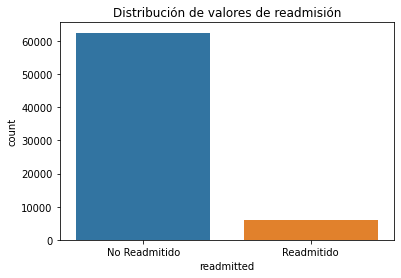

In [200]:
sns.countplot(x=diabetes['readmitted'].map({
  0: "No Readmitido",
  1: "Readmitido"})).set_title('Distribución de valores de readmisión')

* Se observa que la proporción entre readmitidos y no readmitidos esta desbalanceada,por lo que se tendrá en cuenta al momento de entrenar el modelo

Text(0.5, 1.0, 'Edad VS. Readmisión')

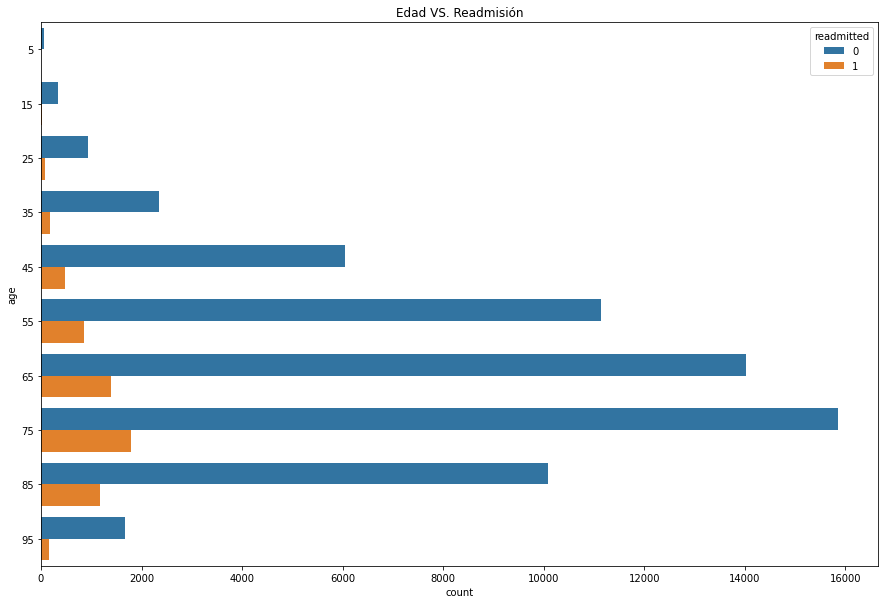

In [83]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= diabetes['age'], hue = diabetes['readmitted']).set_title('Edad VS. Readmisión')

* Se observa que aunque el desbalanceo es marcado en la readmisión, los pacientes de la tercera edad tienen a tener una mayor readmisión, aunque esto puede deberse a que son los pacientes que más asisten a hospitales en primer lugar

In [84]:
diabetes.age.value_counts()

75    17642
65    15414
55    11999
85    11247
45     6530
35     2526
95     1841
25     1009
15      357
5        64
Name: age, dtype: int64

Text(0.5, 1.0, 'Raza VS. Readmisión')

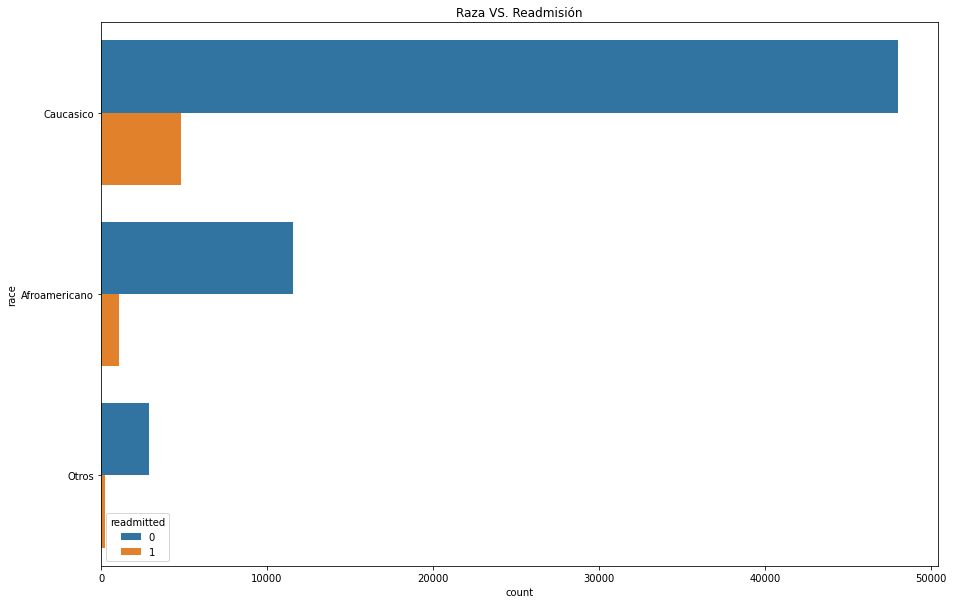

In [85]:
fig = plt.figure(figsize=(15,10))

sns.countplot(y= diabetes['race'].map( {
    1: "Caucasico",
    2: "Afroamericano",
    3: "Otros"
}), 
                hue = diabetes['readmitted']).set_title('Raza VS. Readmisión')

* Se observa que los pacientes caucásicos son los que más son readmitidos, pero de nuevo esto puede podria adjudicarse al desbalanceo presente

Text(0.5, 1.0, 'Genero vs Readmisión')

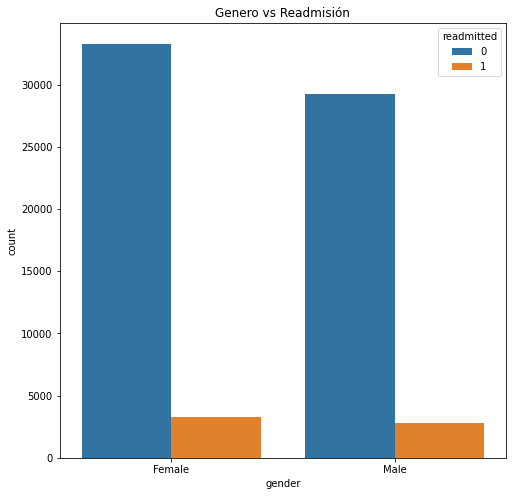

In [86]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = diabetes['gender'].map({
    0: "Female",
    1: "Male"
}), hue = diabetes['readmitted']).set_title("Genero vs Readmisión")

* No parece haber una relación marcada que diferencie la readmisión entre hombres y mujeres

Text(0.5, 1.0, 'Cambio en medicación VS. Readmisión')

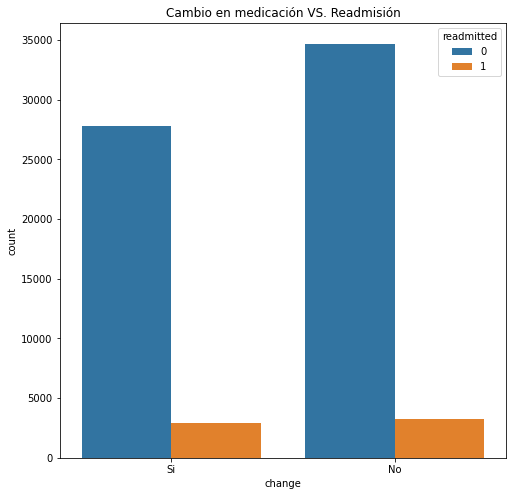

In [87]:
fig = plt.figure(figsize=(8,8))
sns.countplot(x = diabetes['change'].map({
    0:"No",
    1: "Si"
}), hue = diabetes['readmitted']).set_title('Cambio en medicación VS. Readmisión')

In [88]:
diabetes.change.map({
    0:"No",
    1: "Si"
}).value_counts()

No    37923
Si    30706
Name: change, dtype: int64

* Existe cierta tendencia a aumentar la readmisión en los casos donde no hay cambio de medicación, y se observa que el desbalanceo en las clases no es considerable

## Modelado de datos

Para este problema en primera instancia tendré en cuenta la divisón de la data, teniendo un 80% para entrenamiento y un 20% para testeo, pero también teniendo en cuenta el desbalanceo entre readmitidos y no readmitodos, por lo que se hara uso de la libreria SMOTE para hacer over sampling en el dataset

Lo primero que quiero abordar es el desbalanceo de datos presente

In [91]:
diabetes.readmitted.value_counts()

0    62503
1     6126
Name: readmitted, dtype: int64

Se observa que la proporción es aproximadamente 10:1 de no readmitidos contra readmitidos, por lo que se hará uso de una librería encargada de tratar con este desbalanceo, SMOTE

In [92]:
over_sampling = SMOTE(random_state=42)
X, y = over_sampling.fit_resample(diabetes.drop(columns="readmitted"), diabetes.readmitted)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Aplicación de Modelos


Se crea un dataframe de pandas, en el cual tendré el nombre de cada modelo, su accuracy, recall, y precission, para comparar con los modelos básicos, y escoger el modelo que otorgue el mejor ajuste para realizar un proceso de grid search y cross validation

In [105]:
model_comparator_df = pd.DataFrame(columns = ['Nombre Modelo', 'Accuracy', 'Recall', "Precision"])

In [96]:
def basic_model_fitting(model, name):
    global model_comparator_df
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Metricas para el modelo {name}")
    print(accuracy_score(y_test, y_pred))
    print(recall_score(y_test, y_pred))
    print(precision_score(y_test, y_pred))
    model_comparator_df = model_comparator_df.append({'Nombre Modelo' : name, 'Accuracy' : accuracy_score(y_test, y_pred), 'Recall' : recall_score(y_test, y_pred), "Precision": precision_score(y_test, y_pred)}, 
                ignore_index = True)
    print("- -"*30)
    

In [97]:
modelList = [
    [DecisionTreeClassifier(), "Arbol"],
    [AdaBoostClassifier(), "AdaBoost"],
    [GradientBoostingClassifier(), "Gradient Boost"],
    [KNeighborsClassifier(), "KNN"],
    [RandomForestClassifier(), "Random Forest"]
]

In [107]:
for model in modelList:
    basic_model_fitting(model[0], model[1])

Metricas para el modelo Arbol
0.8280537556995441
0.8660107191424686
0.804907063197026
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Metricas para el modelo AdaBoost
0.7530997520198384
0.7904967602591793
0.7354867520095266
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Metricas para el modelo Gradient Boost
0.7652187824974002
0.7822574194064474
0.7564786880173281
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Metricas para el modelo KNN
0.8245740340772738
0.9915206783457323
0.7433283358320839
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
Metricas para el modelo Random Forest
0.8998080153587713
0.896328293736501
0.902609956500725
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


In [108]:
model_comparator_df

,Nombre Modelo,Accuracy,Recall,Precision
0,Arbol,0.828054,0.866011,0.804907
1,AdaBoost,0.753100,0.790497,0.735487
2,Gradient Boost,0.765219,0.782257,0.756479
3,KNN,0.824574,0.991521,0.743328
4,Random Forest,0.899808,0.896328,0.902610


In [109]:
# Se rota el dataset de tal manera que se puede agrupar por metrica, para asi observar el comportamiento de cada modelo
df_melted = pd.melt(model_comparator_df, id_vars="Nombre Modelo", var_name="Metrica", value_name="Valor")

In [110]:
df_melted

,Nombre Modelo,Metrica,Valor
0,Arbol,Accuracy,0.828054
1,AdaBoost,Accuracy,0.753100
2,Gradient Boost,Accuracy,0.765219
3,KNN,Accuracy,0.824574
4,Random Forest,Accuracy,0.899808
5,Arbol,Recall,0.866011
6,AdaBoost,Recall,0.790497
7,Gradient Boost,Recall,0.782257
8,KNN,Recall,0.991521
9,Random Forest,Recall,0.896328


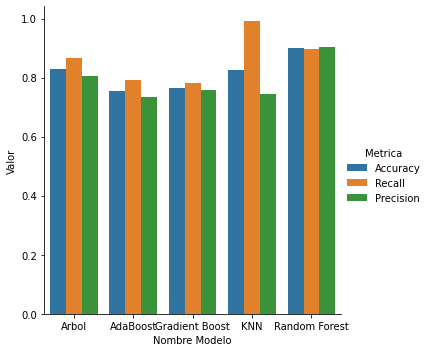

In [101]:
sns.catplot(x='Nombre Modelo', y='Valor', hue='Metrica', data=df_melted, kind='bar')

* Se observa que aunque el modelo e KNN presenta el mayor recall, el modelo de Random Forest presenta los valores mas consistentemente altos de Accuracy, Recall, Precission, por lo que se decide continuar con el modelo de Random Forest


#### Random Forest

In [112]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
y_pred_rf = rf_clf.predict(X_test)

In [114]:
print(accuracy_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf))

0.9030877529797616
0.8982481401487881
0.90702746365105


Se hara uso de la libreria GridSearchCV, con la cual puedo probar el modelo con distintos parámetros y a la vez realizar un proceso de cross validation, en el cual haré una división del dataset en 5 partes, para asi asegurar que las metricas del modelo son constantes a traves de toda la data

In [120]:
# Parametros a utilizar
param_grid = { 
    'n_estimators': [ 200, 400, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [121]:
CV_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)

In [123]:
CV_rf_clf.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 400}

Segun la busqueda realizada por el modelo de Grid Search CV, se tiene que los mejores parámetros son : "Criterion" :"gini",  'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400. Con estas caracteristicas se construye un modelo nuevo de Random Forest

In [124]:
rf_improved_clf = RandomForestClassifier(random_state=42, max_features='auto', max_depth=8, criterion='gini', n_estimators=400)

In [126]:
rf_improved_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=400, random_state=42)

In [128]:
y_pred_rf_improved = rf_improved_clf.predict(X_test)

In [129]:
print(accuracy_score(y_test, y_pred_rf_improved))
print(recall_score(y_test, y_pred_rf_improved))
print(precision_score(y_test, y_pred_rf_improved))

0.7391008719302455
0.7686585073194144
0.7257552870090634


Se observa que la busqueda con GridSearchCV no dió mejores resultados que el valor base de Random Forest, por lo que se mantiene el modelo base que se utilizó en la comparación inicial de modelos

In [131]:
print('Metricas de modelo base de RF')
print(accuracy_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_rf))

Metricas de modelo base de RF
0.9030877529797616
0.8982481401487881
0.90702746365105


Debido a esto se decide realizar una validación cruzada, dividiendo el dataset en 5 partes, y entrenando cada vez con 4 partes, para validar con la parte restante.

In [139]:
scores = cross_val_score(rf_clf, X, y, cv=5)

In [141]:
scores.mean()

0.8821589313853252

Se encuentra que la precisión promedio del modelo se encuentra en el 88%, lo que se considera aceptable para el ejercicio

A continuación se realizará el calculo de la curva ROC par el modelo de Random Forest

In [133]:
y_proba = rf_clf.predict_proba(X_test)[:,1]


In [135]:
print("Roc AUC Random Forest:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1],average='macro'))

Roc AUC Random Forest: 0.9582969159603459


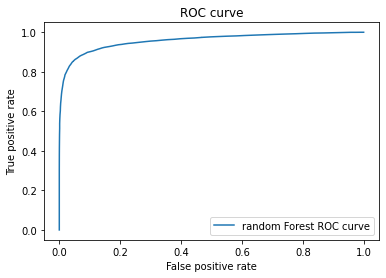

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='random Forest ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show() 

Con la curva de ROC se observa que al tomar el valor de ROC se obtiene un 0.95, el cual es un valor de test muy bueno segun la literatura, además en la curva se observa que el ratio de True Positive toma una forma de curva que indica que se tiene un modelo que se ajusta correctamente a los datos propuestos

Por último se utilizaran las caracteristicas del modelo Random Forest para encontrar las variables que más describen el modelo

In [142]:
important_features = pd.DataFrame(
    {
        "feature":X_train.columns,
        "importance": rf_clf.feature_importances_
    }
)

In [143]:
important_features = important_features.sort_values("importance", ascending=False)

<AxesSubplot:xlabel='importance', ylabel='feature'>

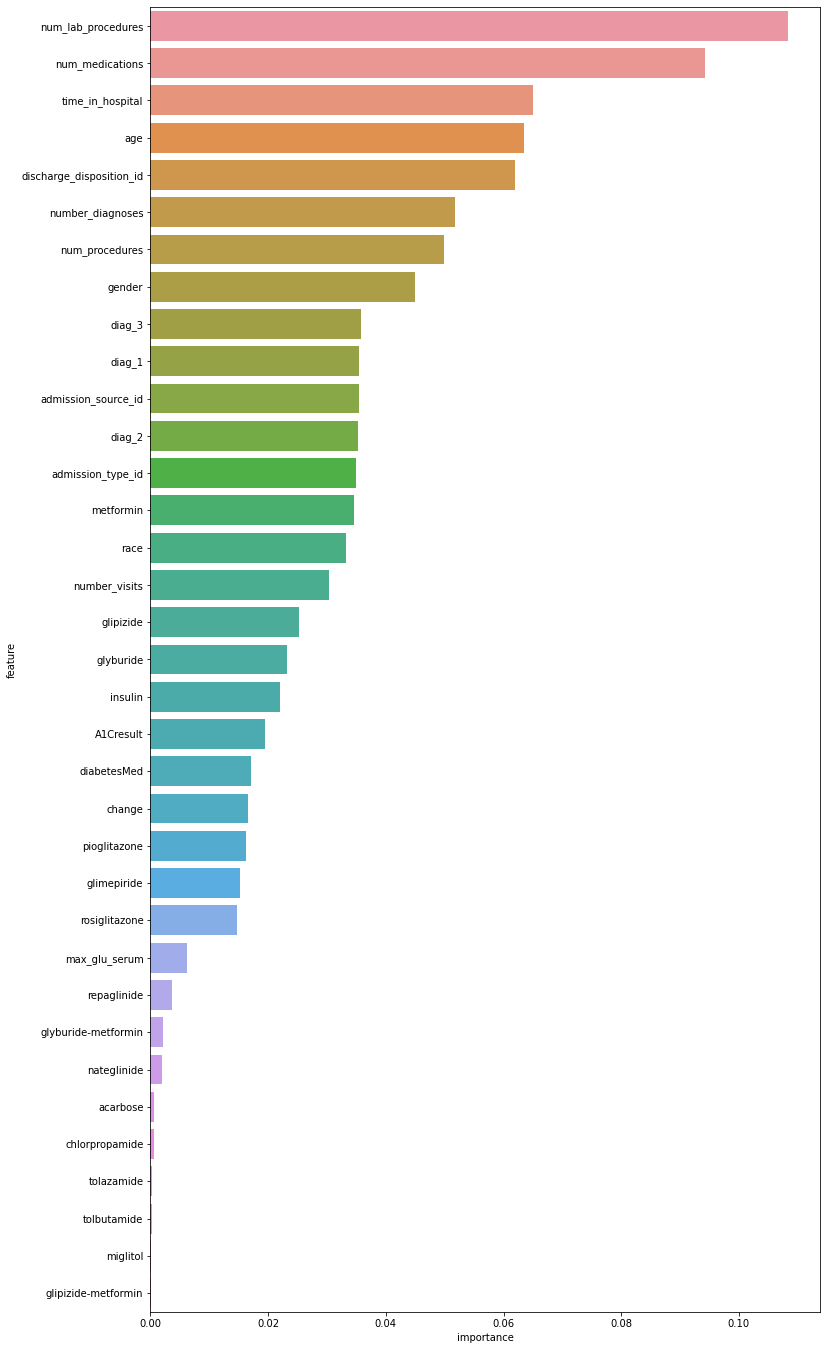

In [144]:
plt.figure(figsize=(12, 24))

sns.barplot(x="importance", y="feature", data=important_features)

In [145]:
importance = 0
for i, row in enumerate(important_features.iterrows()):
    importance += row[1].importance
    if importance >= 0.90:
        print(row[1].feature)
        print(i)
        break

A1Cresult
19


 Se observa con el modelo de random forest que el 90% de los datos son explicados con las primeras 20 columnas, que llegan hasta A1Cresult, siendo las características más descriptivas el número de procedimientos de laboratorio realizados, y el número de medicamentos que fueron administrados al usuario desde el encuentro

### CONCLUSIONES 
1. La limpieza de datos fue un proceso muy importante, ya que se observó que se tenian datos nulos representados por el valor "?", además de tener una columna con el 95% de datos faltantes, la columna de peso.
<br/><br/>
2. Las columnas de identificación, que cuentan con solo valores únicos, o aquellas columnas que contaban con un 99% de datos unicos y solo un 1% (o mucho menos) de un dato distinto, no son representativas para un modelo, por lo que se toma la decisión de eliminarlas del dataset, por otro lado, las columnas de medical_speciality y payer code, al tener más del 30% de datos faltantes, también son eliminadas del dataset.
<br/><br/>
3. El porcentaje de filas con datos nulos representaba menos de un 3% del dataset, y al tener una cantidad de datos mayor a 100.000 se considera que no vale la pena realizar un proceso de imputación, aunque en caso de hacerse, se hubiera realizado con el valor de la moda en el caso de la columna de raza, asi como tambien en las columnas de diagnostico, ya que no existia forma de utilizar promedios ni calculos en estas variables categóricas.
<br/><br/>
4. Se utiliza la información otorgada por el proveedor del dataset, para cambiar las columnas de diagnostico, con el objetivo de reducir la cantidad de clases de diagnostico posibles, y con esto darle al modelo una generalidad e interpretabilidad mayor basada en estas categoricas más generales del *ICD-9*.
<br/><br/>
5. Considero que el proceso de Feature Engineering es de suma importancia para cualquier ejercicio de Machine Learning y Data Science. En específico destaco las siguientes:

  - Convertir la edad a un valor numérico, para asi el modelo sea mas diciente respecto al promedio de edad.
  - Eliminar los duplicados por persona, para asi solo tener en cuenta la readmisión de cada paciente, y no que una actual readmisión entre al modelo
  - Combinar variables categóricas en categorias más amplias, para asi aumentar la generalidad del dataset
  - Definir el problema como un problema binario, ya que considero que estos tipos de problemas tienen soluciones más sencillas en el área del ML, y además la interpretación del problema me llevó a la conclusión de que una readmisión en los primeros 30 días es mi principal objetivo de predicción, por lo que juntar las otras dos variables en una sola me pareció viable
<br/><br/>

6. Se observa que el desbalanceo de datos es considerable, lo que tiene sentido, ya que una gran mayoría de pacientes no vuelve al hospital después de un tratamiento, teniendo en cuenta que la mayoría de casos constituyen tratamientos efectiso, o problemas leves médicos.
<br/><br/>

7. Se encuentran relaciones considerables entre la edad y la readmisión, donde los adultos mayores tienden a asistir más al hospital, por lo que su tasa de readmisión tiende también a aumentar. Por otro lado, se encuentra que el género es indiferente en la tasa de readmisión, o aporta muy poco al modelo final. Y se observa que las características como número de procedimientos y numero de cambios de medicación tienen una alta correlación con la tasa de readmisión.
<br/><br/>
8. En el modelado, se evaluan distintos modelos de clasificación generales, donde se encuentra que el Random Forest se ajusta de mejor manera al dataset creado, por lo que se decide hacer uso de este modelo como principal del ejecicio
<br/><br/>

9. Se encuentra que el modelo de random forest aplicado tiene una precisión del 88% (encontrado con proceso de validación cruzada), definiendo una curva ROC que representa a un modelo que se ajusta bien a los datos, sin tener problemas de overfitting. Considero que para el ejercicio propuesto es un modelo aceptable, que puede ser llevado más allá con más procesos de feature engineering, tal vez la combinación de variables existentes para crear nuevas, o el fine tunning de los parámetros del modelo, aunque en el proceso de grid search realizado no se encontró un modelo mejor al base (esto se puede deber a que los parámetros ingresados al grid no eran los adecuados, se podrían cambiar y buscar parámetros mejores, más cercanos al modelo base).

### RECOMENDACIONES

1. Sería interesante obtener los valores de la columna de peso, ya que considero que el peso de una persona puede ser un factor importante en su readmisión, por problemas de obesidad entre otros.
<br></br>
2. Como recomendación para tener en cuenta en los pacientes, se debería tener en cuenta a aquellos pacientes de edad avanzada que han tenido más cantidad de procedimientos y medicamentos aplicados, ya que darles de alta antes de tiempo puede causar el proceso de readmisión a corto plazo.
<br></br>
3. Los datos de medicamentos específicos podrian ser recopilados de manera más general, ya que no aportan considerablemente a la predicción de readmisión de un paciente

#### Experiencia personal con el ejercicio

Queria agradecerles por la oportunidad de participar en este proceso, espero este ejercicio sirva para demostrar que tengo las capacidades para tomar el cargo al que me encuentro postulado, me apasiona mucho el mundo de la información y el ML, y creo que sería una gran adición para su equipo, y ustedes una gran oportunidad para mi de crecimiento personal y laboral, reitero el agradecimiento y espero tengan un buen día.